# Linear Regression
____

#### Libraries
____

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import statsmodels.formula.api as sm


%matplotlib inline

In [8]:
!pip install statsmodels

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### Load dataset
___

In [10]:
dataset = '../../data/commercial_data_clear.csv'
columns = ['ptype', 'floor_area', 'build_year', 'occupy', 'star', 'site_eui', 'ngas', 'water_use', 'total_fuel']

building = pd.read_csv(dataset, sep=',', usecols=columns)

building.head(5)

ValueError: Usecols do not match columns, columns expected but not found: ['total_fuel']

In [13]:
building= pd.read_csv('../../data/bpd/clean.csv')

building.head(5)

,ptype,floor_area,build_year,occupy,site_eui,ngas,water_use
0,Multifamily Housing,2400000.0,1974,100,143974.4,3.942852e+11,107151.5
1,Multifamily Housing,412503.0,1903,100,32.0,2.047200e+06,22061.0
2,Hospital (General Medical & Surgical),567517.0,1950,100,352.7,1.284867e+08,9574.0
3,Multifamily Housing,321464.0,1939,100,76.2,8.802000e+05,5915.6
4,Multifamily Housing,54913.0,1911,100,17.9,5.941290e+04,231.9


In [14]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6922 entries, 0 to 6921
Data columns (total 7 columns):
ptype         6922 non-null object
floor_area    6922 non-null float64
build_year    6922 non-null int64
occupy        6922 non-null int64
site_eui      6922 non-null float64
ngas          6922 non-null float64
water_use     6922 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 351.5+ KB


In [15]:
building.describe()

,floor_area,build_year,occupy,site_eui,ngas,water_use
count,6.922000e+03,6922.000000,6922.000000,6922.000000,6.922000e+03,6.922000e+03
mean,1.367603e+05,1949.530338,99.102860,271.476914,7.050573e+07,1.647323e+04
std,1.778831e+05,30.826270,5.844747,10723.913111,4.776129e+09,1.598391e+05
min,5.000000e+02,1649.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,6.450925e+04,1927.000000,100.000000,64.000000,1.170827e+06,2.655550e+03
50%,8.645700e+04,1941.000000,100.000000,78.950000,4.083540e+06,4.739850e+03
75%,1.369385e+05,1967.000000,100.000000,96.875000,6.643532e+06,7.974550e+03
max,2.778517e+06,2019.000000,100.000000,869265.000000,3.942852e+11,6.594604e+06


#### Data cleanup
___

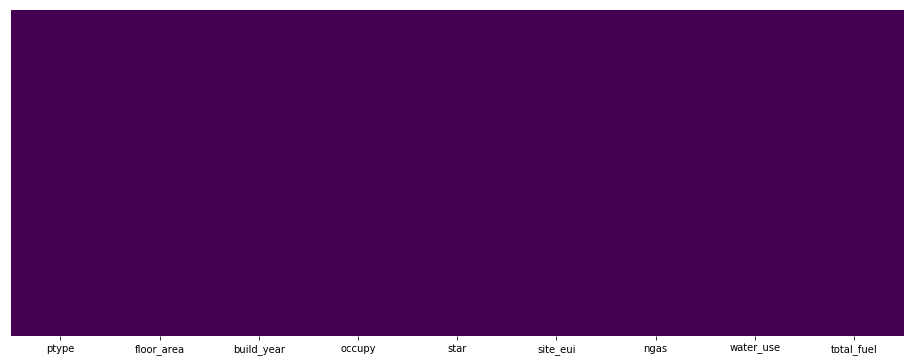

In [10]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [1]:
building.dropna(axis='columns', how='all', inplace=True)
building.dropna(inplace=True)
building.head()

NameError: name 'building' is not defined

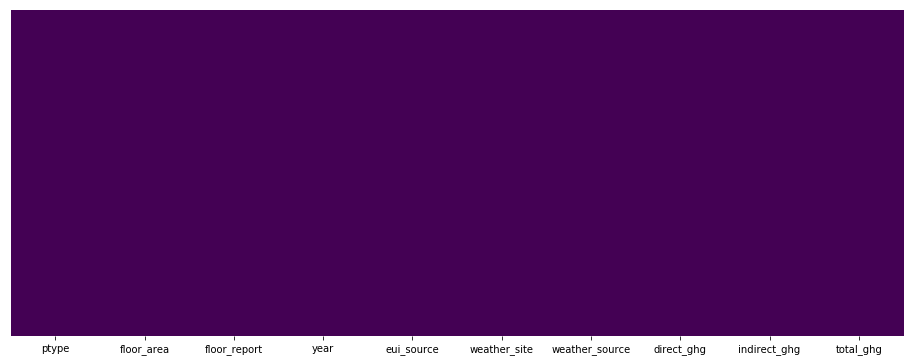

In [81]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### Correlations
___

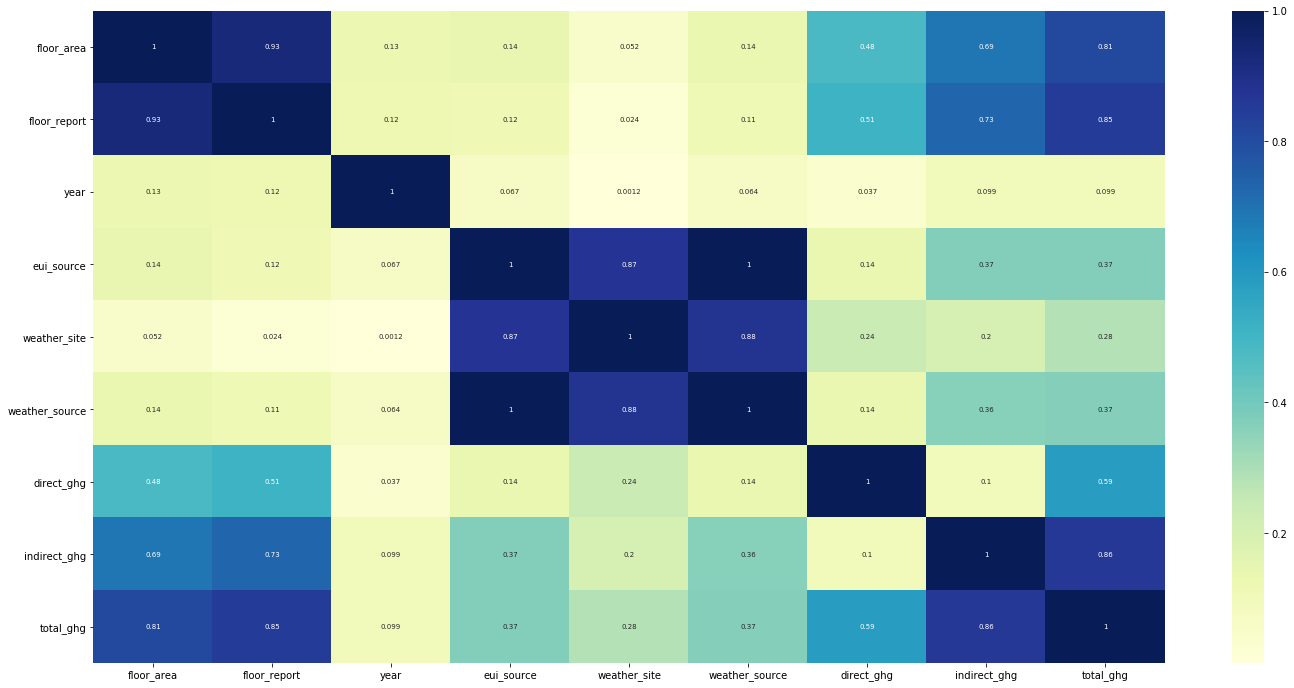

In [62]:
plt.figure(figsize=(24,12))

sns.heatmap(building.corr(), annot=True, annot_kws={"size": 7}, cmap='YlGnBu')
plt.show()

#### Distributions
___

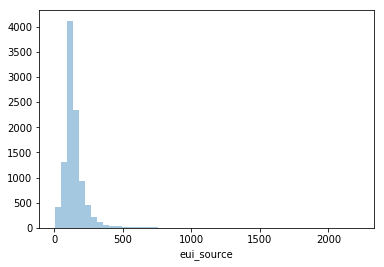

In [63]:
sns.distplot(building['eui_source'], kde=False, bins=50)

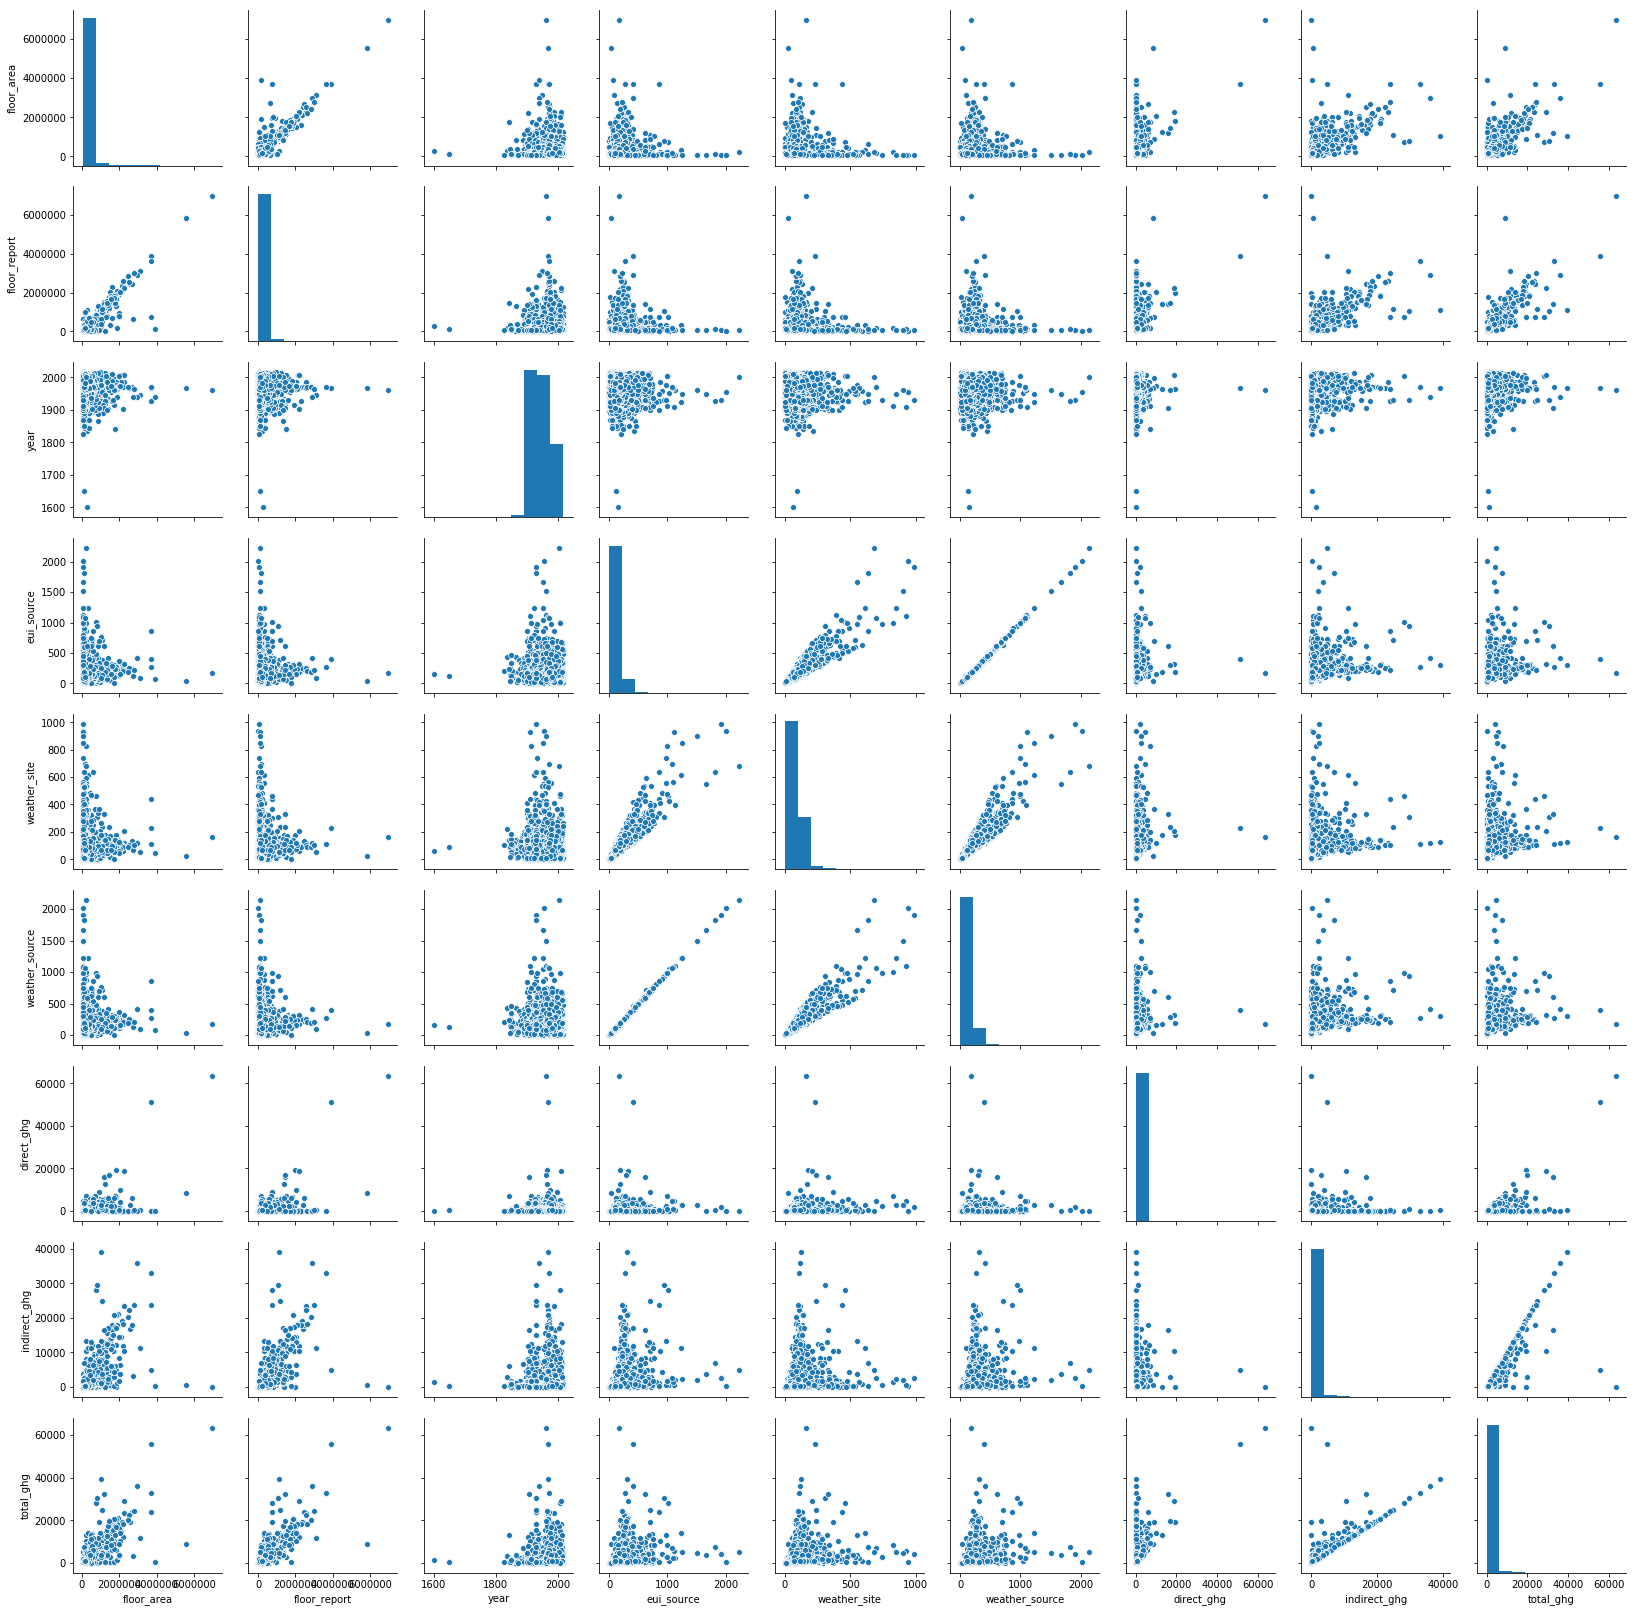

In [94]:
sns.pairplot(building, palette='coolwarm')

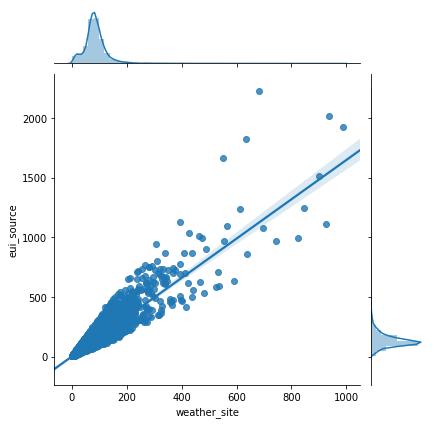

In [64]:
sns.jointplot(x='weather_site', y='eui_source', data=building, kind='reg')

#### Define X, Y variables
___

In [18]:
x_columns = ['ptype', 'floor_area', 'occupy', 'build_year', 'ngas', 'water_use']
y_columns = ['site_eui']

X = building[x_columns].values
Y = building[y_columns].values

#### Label Encoding
___

In [19]:
building['ptype'].unique()

array(['Multifamily Housing', 'Hospital (General Medical & Surgical)',
       'Residence Hall/Dormitory', 'College/University', 'Office',
       'Senior Care Community', 'Self-Storage Facility', 'Enclosed Mall',
       'Retail Store', 'Financial Office', 'Movie Theater', 'Hotel',
       'Parking', 'Data Center', 'Non-Refrigerated Warehouse',
       'Other - Entertainment/Public Assembly', 'Worship Facility',
       'Distribution Center', 'Other', 'Mixed Use Property',
       'K-12 School', 'Manufacturing/Industrial Plant', 'Medical Office',
       'Other - Lodging/Residential', 'Other - Education',
       'Performing Arts', 'Museum', 'Fitness Center/Health Club/Gym',
       'Ambulatory Surgical Center', 'Other - Specialty Hospital',
       'Residential Care Facility', 'Urgent Care/Clinic/Other Outpatient',
       'Outpatient Rehabilitation/Physical Th', 'Other - Mall',
       'Strip Mall', 'Other - Technology/Science', 'Courthouse',
       'Wholesale Club/Supercenter', 'Refrigerated Wa

In [21]:
label_encoder_ptype = LabelEncoder()
X[:, 0] = label_encoder_ptype.fit_transform(building['ptype'])
label_hotencoder_ptype = OneHotEncoder(categorical_features = [0])
X = label_hotencoder_ptype.fit_transform(X)
print(X)

OverflowError: Python int too large to convert to C long

In [5]:
print(X[:,0])

NameError: name 'X' is not defined

### Avoiding the Dummy Variable Trap
____


In [85]:
X = X[:, 1:]

#### Split dataset (TRAIN/TEST) data
____

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [87]:
regressor = LinearRegression() 
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Fitting Simple Linear Regression to the Training Set
_____

In [89]:
y_prediction = regressor.predict(X_test)

#### Real x Predict
_____

In [90]:
pd.DataFrame({
    'Real' : Y_test[:,0],
    'Predict' : y_prediction[:,0]

})

,Real,Predict
0,96.8,92.271805
1,905.3,876.908668
2,98.1,100.608274
3,141.5,140.994988
4,95.6,94.864846
5,84.3,85.562906
6,88.5,88.899454
7,95.4,95.677670
8,134.9,137.878615
9,176.9,175.924019


#### Model Score
__________

In [93]:
print(f"Training Data Score: {regressor.score(X_train, Y_train)}")
print(f"Testing Data Score: {regressor.score(X_test, Y_test)}")

Training Data Score: 0.9987702923412083
Testing Data Score: 0.9988938217660315


### Backward Elimination
___

In [96]:
X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis =1)

In [ ]:
X_optimized = X[:, [0, 1, 2, 3, 4, 5]]

significante_level = 0.05

regressor_OLS = sm.OLS(endog = Y, exog = X_optimized).fit()